# Figure 1 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import f
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import os
import statannotations
from statannotations.Annotator import Annotator
import matplotlib.colors as mcolors

In [2]:
## Print versions
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)
print("statsmodels", sm.__version__)
print("statannotations", statannotations.__version__)

numpy 1.26.0
pandas 1.5.3
seaborn 0.11.2
scipy 1.11.3
statsmodels 0.14.0
statannotations 0.6.0


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['font.family'] = ['Arial']
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE, frameon=False)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set(rc={'font.family': 'Arial'}, font_scale=1.0)
sns.set_style("whitegrid", {'axes.grid': False})

# Import data

In [4]:
df = pd.read_csv("../../output/02_tables/02_data_merged/EquAllRS_08_merged_domains_kindom.csv")
TOTAL_NUMBER_OF_FOALS_plus1 = 32
TOTAL_NUMBER_OF_FOAL_SAMPLES_plus1 = 32


# Spike-in enrichment analysis

/Users/lchen/mambaforge-darwin-x86/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/lchen/mambaforge-darwin-x86/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/lchen/mambaforge-darwin-x86/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/lchen/mambaforge-darwin-x86/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [

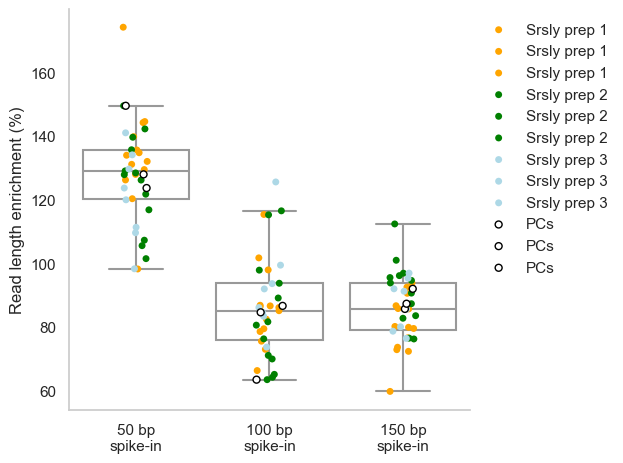

In [18]:
output_path = '../../output/03_microbial/figures/Fig101C_extended_supplement.pdf'


spikein_fraction = df[['R1_02_50mer', 'R1_02_100mer', 'R1_02_150mer','R1_01_raw_fastq']].apply(lambda x : x / x['R1_01_raw_fastq'], axis = 1).drop(columns = ['R1_01_raw_fastq'])
# Enrichment compared to 1/3 
spikein_fraction_enrichment = spikein_fraction.div(spikein_fraction.sum(axis = 1), axis=0)  / ( 1 / 3 ) * 100
## 4 Negative Controls does not have spike-in and count as NaN in the plotting (not included in average)
#sns.boxplot( data=spikein_fraction_enrichment, color = 'black', fill=False, fliersize=0,)
sns.boxplot( data=spikein_fraction_enrichment, color = 'white',fliersize=0,)
spikein_fraction_enrichment['prep_n'] = df['prep_n'].copy()

# For dots per batch
for n,color  in zip([1,2,3], ['orange','green','lightblue',]):
    sub_df1 = spikein_fraction_enrichment[spikein_fraction_enrichment['prep_n'] == f'Srsly prep {n}']
    k1234 = sub_df1.drop(columns = 'prep_n')
    ax = sns.stripplot( data=k1234,  color = color, linewidth = 0, label= f'Srsly prep {n}')
# Black
#sns.stripplot( spikein_fraction_enrichment[:TOTAL_NUMBER_OF_FOAL_SAMPLES_plus1], color = 'black', label='foals cfDNA')
sns.stripplot( data=spikein_fraction_enrichment[-3:], color = 'white' , edgecolor = 'black', linewidth = 1, label='PCs')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Read length enrichment (%)')
ax.set_xticklabels(['50 bp\nspike-in','100 bp\nspike-in', '150 bp\nspike-in',])
ax.legend(bbox_to_anchor = (1,1))
plt.tight_layout()
plt.savefig(output_path)
plt.savefig(output_path+'.png')
plt.show()

# Simplified for Fig 1C

/Users/lchen/mambaforge-darwin-x86/envs/py310/lib/python3.10/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


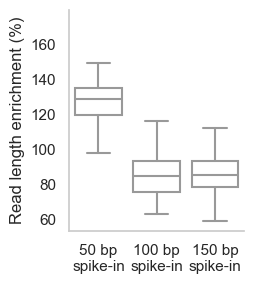

In [17]:
output_path = '../../output/03_microbial/figures/Fig101C.pdf'

fig, ax = plt.subplots(figsize = (2.7,3))
spikein_fraction = df[['R1_02_50mer', 'R1_02_100mer', 'R1_02_150mer','R1_01_raw_fastq']].apply(lambda x : x / x['R1_01_raw_fastq'], axis = 1).drop(columns = ['R1_01_raw_fastq'])
spikein_fraction_enrichment = spikein_fraction.div(spikein_fraction.sum(axis = 1), axis=0)  / ( 1 / 3 ) * 100
sns.boxplot( data=spikein_fraction_enrichment, color = 'white',fliersize=0,)
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Read length enrichment (%)')
ax.set_xticklabels(['50 bp\nspike-in','100 bp\nspike-in', '150 bp\nspike-in'])
ax.legend()
plt.tight_layout()
plt.savefig(output_path)
plt.savefig(output_path+'.png')
plt.show()

# Fig 1D

In [11]:
zymo = ['Pseudomonas', 'Escherichia','Salmonella', 'Limosilactobacillus','Enterococcus','Staphylococcus','Listeria', 'Bacillus','Saccharomyces', 'Cryptococcus'][::-1]


per_sample = []
for PC_index in [1,2,3]:
    PC1 = pd.read_csv(f"../../output/01_pipeline/foal_cohort_EquCabAll/results/bracken_output/after_host_mapping/PC{PC_index}_RS_conf0.8.output" , sep= '\t', index_col = 0)
    PC1['name'] = PC1.index
    PC1['Genus'] = PC1['name'].apply(lambda x: x.split(" ")[0])
    genus = PC1.groupby('Genus').sum()['fraction_total_reads'] 
    genus_high_PC1 = genus[genus> 0.01]
    per_sample.append(genus_high_PC1[zymo].values)

output = pd.DataFrame(np.array(per_sample), columns = zymo, index = ['PC1', 'PC2','PC3'])

/var/folders/s8/yt9ghcjj56g916qzsy6l4p_00000gq/T/ipykernel_43596/409893158.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genus = PC1.groupby('Genus').sum()['fraction_total_reads']
/var/folders/s8/yt9ghcjj56g916qzsy6l4p_00000gq/T/ipykernel_43596/409893158.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genus = PC1.groupby('Genus').sum()['fraction_total_reads']
/var/folders/s8/yt9ghcjj56g916qzsy6l4p_00000gq/T/ipykernel_43596/409893158.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify num

In [12]:
outputT = output.T
outputT.insert(loc = 0,column = 'Expected', value =[0.02]*2 +[0.12]*8 )
output2 = outputT.T
output2.T



,Expected,PC1,PC2,PC3
Cryptococcus,0.02,0.01369,0.01348,0.01369
Saccharomyces,0.02,0.01408,0.01375,0.01376
Bacillus,0.12,0.11821,0.11718,0.11715
Listeria,0.12,0.10586,0.10257,0.10290
Staphylococcus,0.12,0.11731,0.11333,0.11229
Enterococcus,0.12,0.11742,0.11459,0.11417
Limosilactobacillus,0.12,0.11164,0.11322,0.11265
Salmonella,0.12,0.11677,0.11799,0.11939
Escherichia,0.12,0.14719,0.14991,0.14769
Pseudomonas,0.12,0.13739,0.14378,0.14591


In [13]:
output2.T.to_csv('../../output/03_microbial/source_data/Fig101D.csv')

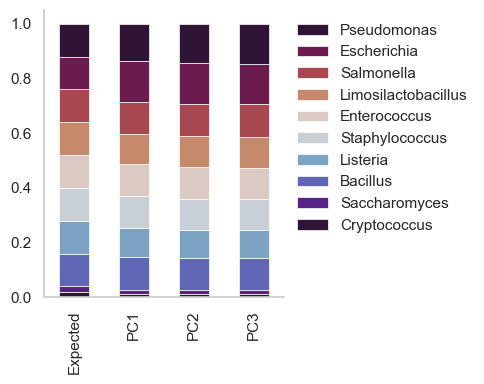

In [14]:
output_path = '../../output/03_microbial/figures/Fig101D.pdf'

ax = output2.plot(kind='bar', stacked=True, colormap='twilight_shifted', figsize = (5,4), linewidth=0.5)
handles, labels = ax.get_legend_handles_labels()
#ax.set_visible(False) 
ax.spines[['right', 'top']].set_visible(False)
plt.legend(reversed(handles), reversed(labels), bbox_to_anchor = (1,1))
plt.tight_layout()

plt.savefig(output_path)
plt.savefig(output_path+'.png')
